<a href="https://colab.research.google.com/github/CristianoDataScience/Multilayers-Perceptron/blob/main/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron multicamadas-MLP com Keras**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

In [3]:
df = pd.read_csv('/content/drive/MyDrive/series-temporais-auto-arima/Dados/AirPassengers.csv',
                 sep=',', parse_dates=True, index_col=0)
data = df.values
np.random.seed(3)

In [4]:
data = data.astype('float32')

In [5]:
train = data[0:125, :]
test = data[125:, :]

In [6]:
def prepare_data(data, lags=1):
  X, y = [], []
  for row in range(len(data) - lags - 1):
    a = data[row:(row + lags), 0]
    X.append(a)
    y.append(data[row + lags, 0])
  return np.array(X), np.array(y)

In [7]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test

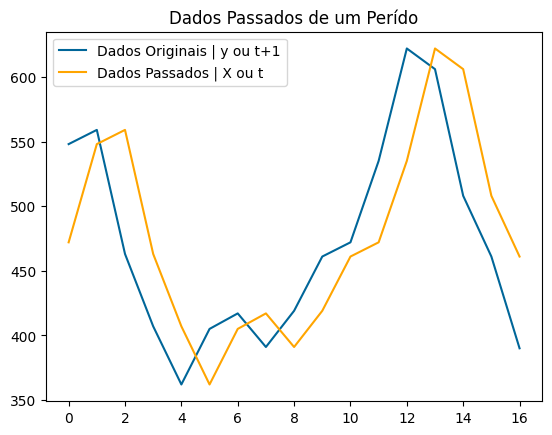

In [9]:
plt.plot(y_test, label="Dados Originais | y ou t+1", color="#006699")
plt.plot(X_test, label="Dados Passados | X ou t", color="orange")
plt.legend(loc="upper left")
plt.title("Dados Passados de um Perído")
plt.show()

In [10]:
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
62/62 - 1s - 24ms/step - loss: 69773.6875
Epoch 2/200
62/62 - 0s - 5ms/step - loss: 64471.4844
Epoch 3/200
62/62 - 0s - 2ms/step - loss: 57909.8242
Epoch 4/200
62/62 - 0s - 2ms/step - loss: 50423.6719
Epoch 5/200
62/62 - 0s - 2ms/step - loss: 42373.0977
Epoch 6/200
62/62 - 0s - 2ms/step - loss: 34208.6250
Epoch 7/200
62/62 - 0s - 2ms/step - loss: 26530.7559
Epoch 8/200
62/62 - 0s - 5ms/step - loss: 19600.9121
Epoch 9/200
62/62 - 0s - 5ms/step - loss: 13864.4502
Epoch 10/200
62/62 - 0s - 5ms/step - loss: 9336.2588
Epoch 11/200
62/62 - 0s - 4ms/step - loss: 6044.6587
Epoch 12/200
62/62 - 0s - 2ms/step - loss: 3819.6147
Epoch 13/200
62/62 - 0s - 3ms/step - loss: 2414.3462
Epoch 14/200
62/62 - 0s - 2ms/step - loss: 1615.1387
Epoch 15/200
62/62 - 0s - 2ms/step - loss: 1196.0824
Epoch 16/200
62/62 - 0s - 1ms/step - loss: 991.1340
Epoch 17/200
62/62 - 0s - 2ms/step - loss: 904.5805
Epoch 18/200
62/62 - 0s - 2ms/step - loss: 869.8842
Epoch 19/200
62/62 - 0s - 1ms/step - loss: 851.0

In [11]:
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print("Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)".format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print("Pontuação de Teste: {:.2f} MSE ({:.2f} RMSE)".format(test_score, math.sqrt(test_score)))

Pontuação de Treino: 831.11 MSE (28.83 RMSE)
Pontuação de Teste: 3180.16 MSE (56.39 RMSE)


In [12]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [13]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

In [15]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (lags*2)+1:len(data) -1, :] = test_predict

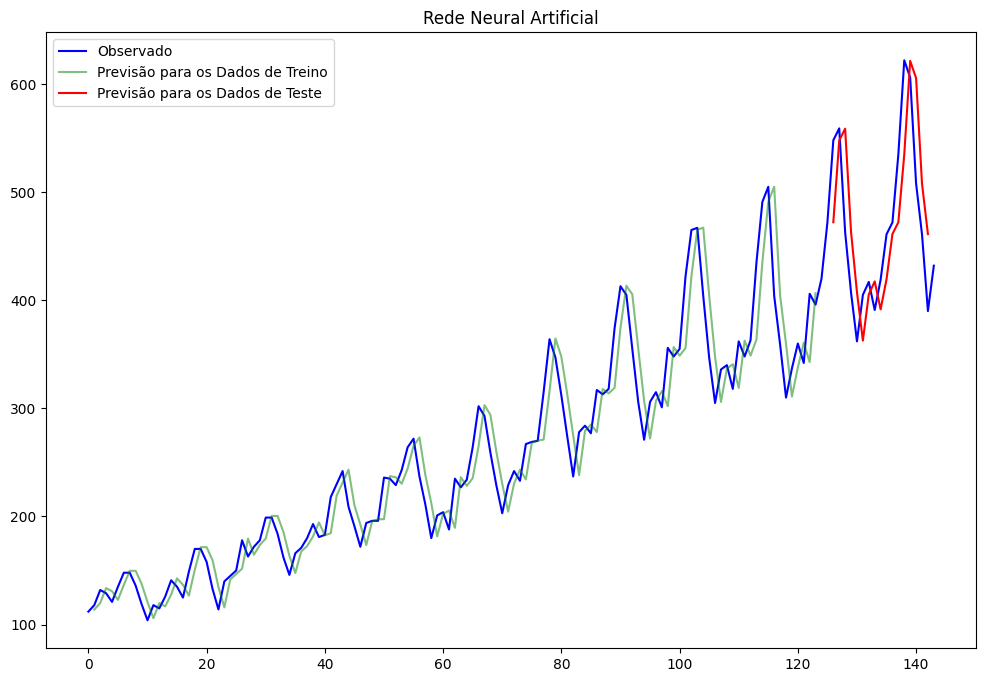

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(data, label="Observado", color='blue');
plt.plot(train_predict_plot, label="Previsão para os Dados de Treino", color='green', alpha=0.5);
plt.plot(test_predict_plot, label="Previsão para os Dados de Teste", color='red');
plt.legend(loc="best");
plt.title("Rede Neural Artificial")
plt.show()